# Data Science 2: Multivariate Component Analysis Exam, 05 July 2022
 - Date: 05-July-2022
 - Student: Parvej Chowdhury
 - Student ID:434653

In [1]:
# Import of the necessary libraries
import pandas as pd
import numpy as np

## Building Model
from sklearn import linear_model
from scipy import stats
from sklearn import datasets
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set()

## Multidimensional Scaling
from sklearn.manifold import MDS
import sklearn.datasets as dt
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import warnings
warnings.filterwarnings("ignore")

# Dataset: metabolom_data.csv 

The dataset **metabolom_data.csv** contains the measurements of monoterpenes in certain plant leaves in AUC/mg. 
These data come from the 2021 paper 'Unifying community detection across scales from genomes to landscapes' from Hudon and coworkers.

The dataset contains the the measurements of monoterpenes in certain plant leaves in AUC/mg. The dataset can be used to predict the species with multiple variables as input: Unk3.2, Unk3.6, Unk11.9, Unk12.4, aPinene, Camphene etc. 

Therefore, **Princilpe Component Aanlysis (PCA)** will be performed on this dataset. The expectation is that PCA will reduce the amount of variables (monoterpenes in plant leaves) to a smaller amount while still explaining most of the variance(Species). The expected result will be the amount of monoterpenes influence to determine the certain Species.


## Principle Component Analysis

In [2]:
# Read in data
df_metabolom = pd.read_csv('metabolom_data.csv', sep=',')
df_metabolom.head()

# len(df_metabolom.columns)

,SampleID,Species,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
0,MF032,wyoming,17.447216,78.480388,2.575015,0.480588,6.873549,14.667799,10.505447,64.308777,5.311575,6.917810,10.258485,29.725402,5.320274,92.868922,32.733879,245.373027,9.190845
1,MF034,wyoming,0.000000,0.000000,0.566885,9.274434,29.331204,189.922801,20.664100,0.368826,8.201353,140.641077,0.000000,1.275490,0.000000,0.000000,675.617594,13.323675,0.646352
2,MF036,wyoming,13.247976,52.978520,3.838784,0.000000,5.958195,6.564323,23.170531,61.671574,2.010833,4.594991,9.309720,27.877841,10.200175,54.894681,25.178064,232.263740,8.166170
3,MF038,wyoming,0.000000,71.897745,5.582314,7.300492,8.662203,3.662696,9.404492,0.165965,1.854227,6.792163,9.031663,32.740878,7.444111,67.025993,24.894070,392.559512,10.195839
4,MF049,wyoming,15.501606,56.658287,7.009434,0.397118,0.000000,9.505731,11.259664,18.164837,3.222653,17.167722,9.857530,6.071136,10.047028,87.913989,33.114384,0.341623,11.994086


Columns **'SampleID'** is nothing but the sample information of the dataset. Hence this column is not required for our investigation, I am going to delete this column. 

In [3]:
df_metabolom.drop(columns=['SampleID'], inplace=True)

In [4]:
df_metabolom.head()

,Species,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
0,wyoming,17.447216,78.480388,2.575015,0.480588,6.873549,14.667799,10.505447,64.308777,5.311575,6.917810,10.258485,29.725402,5.320274,92.868922,32.733879,245.373027,9.190845
1,wyoming,0.000000,0.000000,0.566885,9.274434,29.331204,189.922801,20.664100,0.368826,8.201353,140.641077,0.000000,1.275490,0.000000,0.000000,675.617594,13.323675,0.646352
2,wyoming,13.247976,52.978520,3.838784,0.000000,5.958195,6.564323,23.170531,61.671574,2.010833,4.594991,9.309720,27.877841,10.200175,54.894681,25.178064,232.263740,8.166170
3,wyoming,0.000000,71.897745,5.582314,7.300492,8.662203,3.662696,9.404492,0.165965,1.854227,6.792163,9.031663,32.740878,7.444111,67.025993,24.894070,392.559512,10.195839
4,wyoming,15.501606,56.658287,7.009434,0.397118,0.000000,9.505731,11.259664,18.164837,3.222653,17.167722,9.857530,6.071136,10.047028,87.913989,33.114384,0.341623,11.994086


In [5]:
# After deleting the column, lets check the shape of the dataset
print("Shape of the dataset:", df_metabolom.shape)

Shape of the dataset: (94, 18)


In [6]:
# Checking for null values
print("Total NULL values in the dataset:", df_metabolom.isnull().sum().sum())

Total NULL values in the dataset: 0


**It seems that the given dataset is clear and there is no NULL value in the dataset.**

In [7]:
#Checking the dataset information:
df_metabolom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        94 non-null     object 
 1   Unk3.2         94 non-null     float64
 2   Unk3.6         94 non-null     float64
 3   Unk11.9        94 non-null     float64
 4   Unk12.4        94 non-null     float64
 5   aPinene        94 non-null     float64
 6   Camphene       94 non-null     float64
 7   bPinene        94 non-null     float64
 8   aPhellendrine  94 non-null     float64
 9   pcymene        94 non-null     float64
 10  Cineole        94 non-null     float64
 11  Unk18.2        94 non-null     float64
 12  Unk18.6        94 non-null     float64
 13  Unk20.5        94 non-null     float64
 14  Camphor        94 non-null     float64
 15  Unk21          94 non-null     float64
 16  Unk21.5        94 non-null     float64
 17  Unk23.5        94 non-null     float64
dtypes: float64(1

In [8]:
df_metabolom.describe()

,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,23.637208,49.746440,6.028160,4.369462,22.911734,73.423817,39.719561,19.620489,13.460596,31.659868,3.866462,10.295510,10.949594,51.884227,184.170440,70.105139,4.835827
std,11.762238,45.934756,9.760219,4.632796,30.168345,78.552456,38.794557,19.379608,14.916398,40.397170,3.589812,10.425231,15.539999,51.173726,270.186770,84.544764,9.389413
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.986044,0.466470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.798040,0.000000,0.000000,0.834461,2.362724,14.679631,11.553669,0.284020,2.732513,6.784367,0.000000,1.143200,0.000000,0.000000,13.898473,12.770461,0.375234
50%,24.549037,47.725224,3.838140,2.142871,5.044977,36.711745,29.782808,17.554953,5.429638,18.361643,3.436247,7.103815,4.854931,43.214138,21.627030,26.224342,4.071432
75%,30.255157,82.348979,6.979114,8.220087,44.599787,132.203274,50.284228,28.230423,21.953681,39.211700,6.106592,14.967212,14.658471,87.353869,485.348779,99.281195,6.601073
max,74.597506,199.915950,79.309390,14.912475,90.414947,295.400252,177.494829,97.095495,57.183207,246.192845,13.061673,45.105145,74.836348,212.499174,776.341069,392.559512,89.137992


The **Species** column contains the inforamtion of the species and the other 19 columns contain the monoterpenes information. Doing a regression with 19 variables can lead to overfitting and more variables can lead to reduced accuracy of a predictive model. If there are less variables, machine learning algorithms are able to identify patters much more efficiently. Therefore, a dimension reduction is useful in this case. PCA can be used to reduce the dimensionality while retaining as much of the variation in the original dataset as possible. PCA will deal with multicollinearity.

#### Now lets define the predictros (X) and target (y)

In [9]:
# Predictors
X = df_metabolom.drop(["Species"], axis=1).reset_index()
# print(X.columns)

# Target
y = df_metabolom.Species

# y

In [10]:
# Scale the data 
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [11]:
# Perform PCA on the data
pca = PCA(n_components=10)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [12]:
# Print the cummulative amount of explained variance per component
s = np.cumsum(pca.explained_variance_ratio_ * 100)
i = 1
for value in s:
    if value <= 85:
        print('Component', i, ":", round(value,2),'%')
        i += 1

Component 1 : 44.44 %
Component 2 : 58.91 %
Component 3 : 66.63 %
Component 4 : 72.71 %
Component 5 : 77.52 %
Component 6 : 81.72 %


The PCA has reduced the 18 features to 6 components that explain ~81%. This will be useful for futher predicitive modelling.

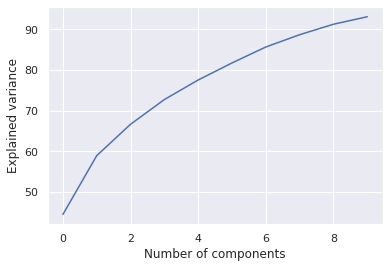

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show();

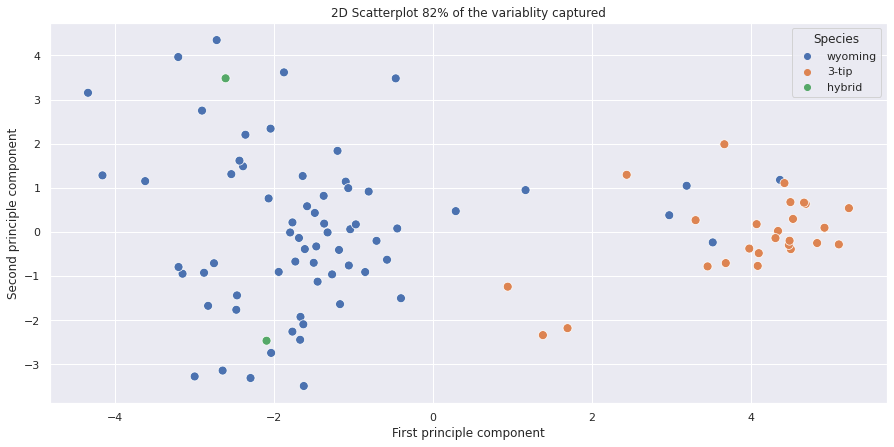

In [14]:
pca_2 = PCA(n_components=2)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

plt.figure(figsize=(15, 7))
sns.scatterplot(x=X_pca_2[:,0], y=X_pca_2[:,1], s=80, hue=y)

plt.title('2D Scatterplot 82% of the variablity captured')
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.show()

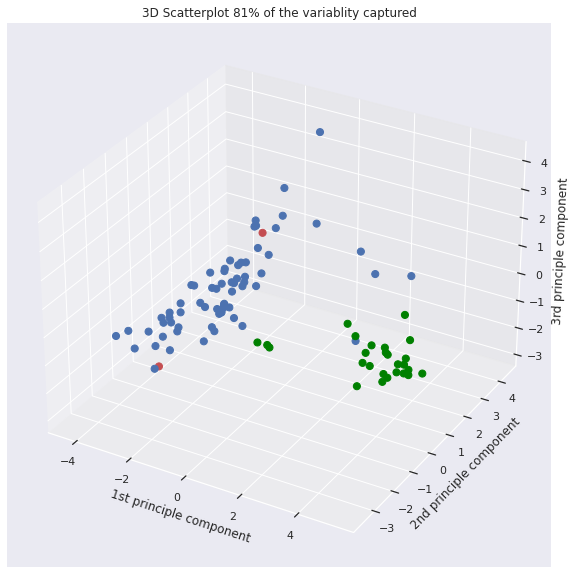

In [15]:
pca_3 = PCA(n_components=3)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

fig = plt.figure(figsize=(20, 10))

ax = plt.axes(projection='3d')

# Colors:
variants = list(df_metabolom['Species'])

# Convert to number:
colors_variant = {'wyoming': 'b', '3-tip': 'green', 'hybrid': 'r'}
colors = []
for variant in variants:
    colors.append(colors_variant[variant])

# print(colors)

sctt = ax.scatter3D(X_pca_3[:,0], X_pca_3[:,1], X_pca_3[:,2], s=50, alpha=1, c = colors)

plt.title('3D Scatterplot 81% of the variablity captured')
ax.set_xlabel('1st principle component')
ax.set_ylabel('2nd principle component')
ax.set_zlabel('3rd principle component')
plt.show()

In [16]:
pca_85 = PCA(n_components=0.81)
pca_85.fit(X_scaled)
X_pca_85 = pca_85.transform(X_scaled)

X_pca_85.shape

(94, 6)

As shown in the above plots, **2 or 3 principle components** already separates the data pretty well. To create a new dataset for further steps, a new dataframe is made with principle components that explain atleast 81% of the data. In this case that is 6 principle components.

In [17]:
df_new = pd.DataFrame(X_pca_85, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
# df_new['Species'] = df_metabolom['Species']
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.995394,-3.277253,0.179364,0.715609,0.956485,-0.984690
1,3.521107,-0.238207,3.140078,0.466864,0.738126,-0.251255
2,-2.643731,-3.143606,0.381955,0.031831,1.036343,-0.908493
3,-1.622977,-3.493810,0.872784,0.761744,2.021948,-1.343294
4,-1.498007,-0.700354,1.281993,1.056009,0.341288,1.794466


Now the PCA part is done. The result is a workable dataset with less components (from 18 to 6) explaining 81% of the variance.

After the dimension reduction, it is possible to do a principle component regression (PCR).

# Principle Component Regression (PCR)

Principle Component Regression can be performed to predict the variant of the monoterpenes in the plant leaves. SKlearn will be used to split the dataset in a training and testing set. A random forest algorithm will be used for regression. Principle Component Regression can now be used to predict the monoterpenes in the plant leaves variant without using thousands of features, but just using the principle components. The results of the PCA show that distinguishing between variants will probably be possible with only a few principle components. 

In [18]:
df_metabolom.head()

,Species,Unk3.2,Unk3.6,Unk11.9,Unk12.4,aPinene,Camphene,bPinene,aPhellendrine,pcymene,Cineole,Unk18.2,Unk18.6,Unk20.5,Camphor,Unk21,Unk21.5,Unk23.5
0,wyoming,17.447216,78.480388,2.575015,0.480588,6.873549,14.667799,10.505447,64.308777,5.311575,6.917810,10.258485,29.725402,5.320274,92.868922,32.733879,245.373027,9.190845
1,wyoming,0.000000,0.000000,0.566885,9.274434,29.331204,189.922801,20.664100,0.368826,8.201353,140.641077,0.000000,1.275490,0.000000,0.000000,675.617594,13.323675,0.646352
2,wyoming,13.247976,52.978520,3.838784,0.000000,5.958195,6.564323,23.170531,61.671574,2.010833,4.594991,9.309720,27.877841,10.200175,54.894681,25.178064,232.263740,8.166170
3,wyoming,0.000000,71.897745,5.582314,7.300492,8.662203,3.662696,9.404492,0.165965,1.854227,6.792163,9.031663,32.740878,7.444111,67.025993,24.894070,392.559512,10.195839
4,wyoming,15.501606,56.658287,7.009434,0.397118,0.000000,9.505731,11.259664,18.164837,3.222653,17.167722,9.857530,6.071136,10.047028,87.913989,33.114384,0.341623,11.994086


In [19]:
# Define target: The mutation variant

y=df_metabolom['Species']
# print(y)

# Define predictors: The coordinates
X = df_metabolom.iloc[:,1:]
# print(X.shape)

The data is split into test and training. This is done to test how well the regression model behaves later on. In this case, 20% is used to test on.

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

PCA is performed again, with varying number of principle components. The accuracy of the prediction is printed out to see how well the model performs with the amount of principal components used.

In [21]:
def pcr(n_components):

    # Perform the PCA
    pca = PCA(n_components=n_components)
    X_train_transformed = pca.fit_transform(X_train)
    X_test_transformed = pca.transform(X_test)

    classifier = RandomForestClassifier(max_depth=2, random_state=0)
    classifier.fit(X_train_transformed, y_train)

    # Predicting the results of the test set
    y_pred = classifier.predict(X_test_transformed)
    
    return accuracy_score(y_test, y_pred)

accuracy_scores = []
for i in range(1, 18):
    accuracy_scores.append(pcr(i))

In [22]:
print(accuracy_scores)

[0.8947368421052632, 1.0, 1.0, 0.8947368421052632, 0.8947368421052632, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 1.0, 0.8947368421052632, 1.0, 0.9473684210526315, 1.0]


Below, the accuracy is plot against the number of principle components. Using 3 principle components shows 100% accuracy. In the graphs from the PCA chapter, it was clear there was already a good seperation by just using 2 principle components.

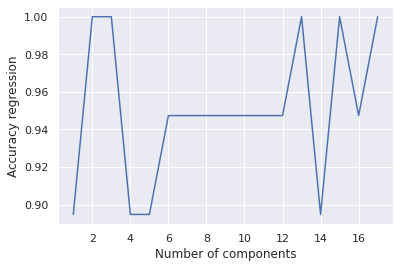

In [23]:
plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores)
plt.xlabel('Number of components')
plt.ylabel('Accuracy regression')
plt.show();

# Discussion

**Principle Component Analysis(PCA)** has been done to reduce the amount of components for the following regression technique. As expected, most of the variance could be captured in an a lot smaller number of components. This is useful for the PCR step.

**Principle Component Regression (PCR)** has been performed to classify the mutation variants according to their coordinates. Using a **Random Forest** algorithm and for 2, 3, 13 and 15 principle coordinates results is 100% accuracy of the classifications. The minimum level of accuracy is around 90%. Once this level is reached, the accuracy doesn't necessarily increase with increased number of principle components.